In [4]:
# Core Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from portfolio_optimizer import portfolio_optimizer
from backtest import backtest, display_backtest_results
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from typing import List

# data used to replicate paper results
# VTI, AGG, DBC, VIX
start_date = "2010-01-01"
end_date = "2020-06-30"
price_long_paper = pd.read_csv("data_clean/long_format_daily_original_paper_data.csv")
price_long_paper["Date"] = pd.to_datetime(price_long_paper["Date"])
price_long_paper = price_long_paper.loc[(price_long_paper["Date"] >= start_date) & (price_long_paper["Date"] <= end_date), :]
price_wide_paper = price_long_paper.pivot(index='Date', columns='Ticker', values='Price')

# # full data
# start_date = "1995-01-01"
# end_date = "2022-12-31"
# price_long = pd.read_csv("data_clean/long_format_daily.csv")
# price_long["Date"] = pd.to_datetime(price_long["Date"])
# price_long = price_long.loc[(price_long["Date"] >= start_date) & (price_long["Date"] <= end_date), :]

# # very short data for testing
# price_long_test = price_long.loc[(price_long["Date"] >= '2022-01-01'), :]
# price_wide_test = price_long_test.pivot(index='Date', columns='Ticker', values='Price')
# return_wide_test = price_wide_test.pct_change().iloc[1:,:]

# Replicate Paper Result

In [5]:
%%time

# ORIGINAL LSTM
tf.keras.utils.set_random_seed(100)
# tf.random.set_seed(100)
portfolio_paper = portfolio_optimizer(price_long_paper)
weight_LSTM = portfolio_paper.optimize("LSTM", period = 252)

1/1 [==============================] - 0s 248ms/step
successfully optimized portfolio weights
CPU times: user 21.3 s, sys: 481 ms, total: 21.8 s
Wall time: 20.7 s


In [6]:
# static allocations
weight_alloc_1 = weight_LSTM.copy()
weight_alloc_2 = weight_LSTM.copy()
weight_alloc_3 = weight_LSTM.copy()
weight_alloc_4 = weight_LSTM.copy()
weight_alloc_1["Weight"] = 1/4
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VTI", "Weight"] = 1/2
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "AGG", "Weight"] = 1/10
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VTI", "Weight"] = 1/10
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "AGG", "Weight"] = 1/2
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VTI", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "AGG", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "DBC", "Weight"] = 1/10
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VIX", "Weight"] = 1/10

# benchmarks
weight_variance = portfolio_paper.optimize("variance", period = 252)
weight_sharpe = portfolio_paper.optimize("sharpe", period = 252)
weight_markowitz3 = portfolio_paper.optimize("markowitz3", period = 252)
weight_DR = portfolio_paper.optimize("divers_ratio", period = 252)
weight_MRC = portfolio_paper.optimize("marginal_risk_contribution", period = 252)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Allocation 1,Allocation 2,Allocation 3,Allocation 4,minVar,maxSharpe,Markowitz 3.0,maxDR,minMRC,LSTM
avg annualized ret,0.241715,0.221830,0.194304,0.140771,0.053237,0.099861,0.106714,0.138780,0.035015,0.196748
avg annualized std,0.297687,0.207538,0.252811,0.096675,0.034375,0.059457,0.113665,0.076106,0.030779,0.303979
sharpe ratio,0.811977,1.068864,0.768573,1.456123,1.548736,1.679535,0.938845,1.823509,1.137634,0.647243
adjusted sharpe ratio,0.557261,0.003432,0.605477,-2.024451,-3.164343,-0.678447,-0.577884,-3.427763,0.228074,0.656156
skewness,2.596907,2.916277,2.443905,2.891536,-1.126662,0.367602,2.946600,0.422871,-1.123463,1.093406
excess kurtosis,24.212207,31.853192,21.341029,34.999354,27.539843,12.820439,56.542480,21.712680,10.876210,5.968334
maximum drawdown,-0.182366,-0.126222,-0.164534,-0.080612,-0.087113,-0.103538,-0.156642,-0.144964,-0.070101,-0.290893
maximum drawdown length (days),89.000000,249.000000,89.000000,83.000000,82.000000,80.000000,132.000000,80.000000,96.000000,369.000000
VaR (95%),-0.022812,-0.015943,-0.019591,-0.007292,-0.002882,-0.004903,-0.007310,-0.005794,-0.002842,-0.025345
CVaR (95%),-0.030872,-0.021658,-0.026467,-0.010298,-0.004823,-0.008226,-0.015742,-0.010217,-0.004429,-0.039113


CPU times: user 12.8 s, sys: 63.2 ms, total: 12.9 s
Wall time: 13.2 s


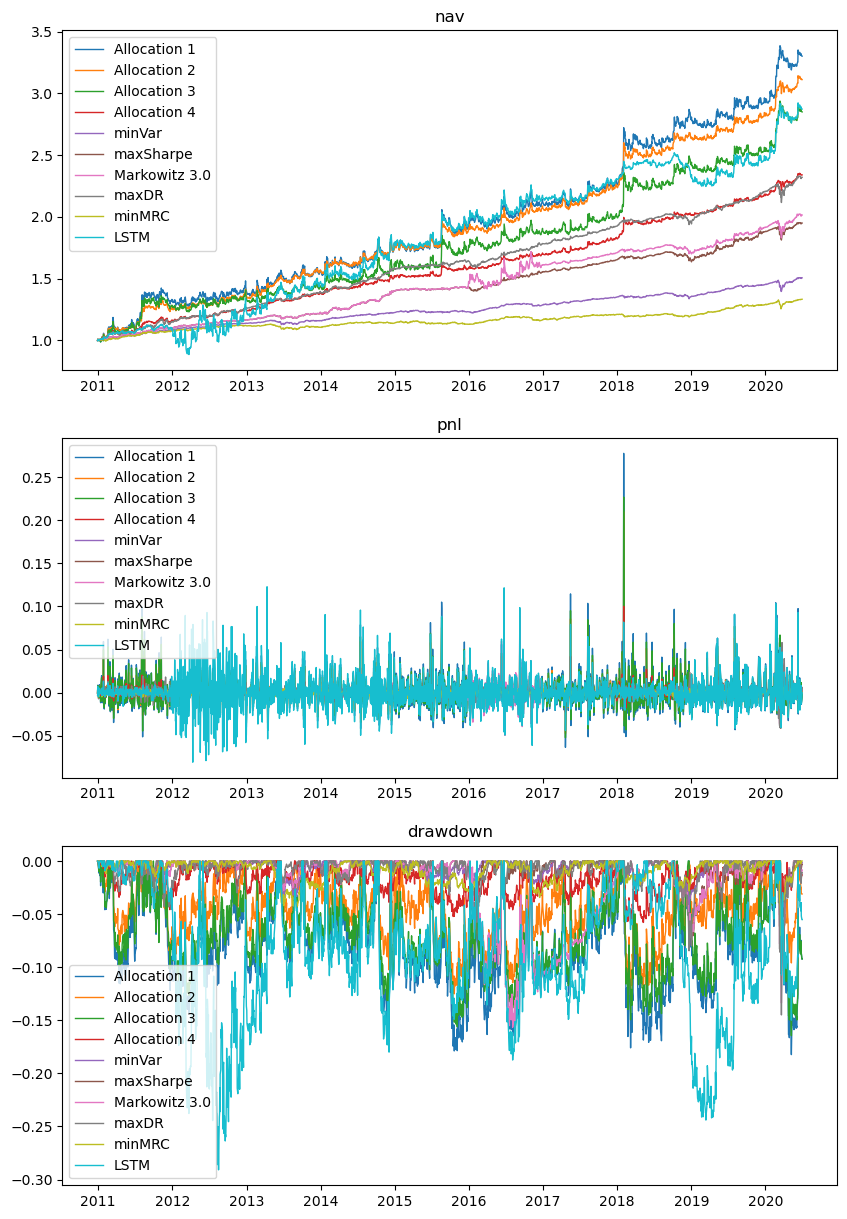

In [7]:
%%time
display_backtest_results(
    [weight_alloc_1, 
     weight_alloc_2, 
     weight_alloc_3, 
     weight_alloc_4,
     weight_variance,
     weight_sharpe,
     weight_markowitz3,
     weight_DR,
     weight_MRC,
     weight_LSTM, 
    ], 
    ["Allocation 1", "Allocation 2", "Allocation 3", "Allocation 4", "minVar", "maxSharpe", "Markowitz 3.0", "maxDR", "minMRC", "LSTM"])

# Improvement 1: loss function & L2 Reg

In [8]:
%%time

tf.keras.utils.set_random_seed(100)
weight_LSTM_return = portfolio_paper.optimize("LSTM", period = 252, loss = "return")
weight_LSTM_convex = portfolio_paper.optimize("LSTM", period = 252, loss = "convex")
weight_LSTM_reg = portfolio_paper.optimize("LSTM", period = 252, reg = True)
weight_LSTM_convex_reg = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", reg = True)

1/1 [==============================] - 0s 251ms/step
successfully optimized portfolio weights
1/1 [==============================] - 1s 537ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 258ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 243ms/step
successfully optimized portfolio weights
CPU times: user 1min 23s, sys: 1.88 s, total: 1min 25s
Wall time: 1min 21s


,LSTM_paper,LSTM_return,LSTM_convex,LSTM_l2reg,LSTM_convex_l2reg
avg annualized ret,0.196748,0.165652,0.148312,0.247354,0.168892
avg annualized std,0.303979,0.220851,0.142589,0.306461,0.257022
sharpe ratio,0.647243,0.750063,1.040137,0.807130,0.657113
adjusted sharpe ratio,0.656156,0.684639,-3.535701,0.705630,0.643091
skewness,1.093406,2.028092,6.115322,2.303121,1.885629
excess kurtosis,5.968334,14.536535,121.108536,16.046724,12.664260
maximum drawdown,-0.290893,-0.280263,-0.168196,-0.244050,-0.242923
maximum drawdown length (days),369.000000,500.000000,980.000000,307.000000,89.000000
VaR (95%),-0.025345,-0.018498,-0.010330,-0.024516,-0.021796
CVaR (95%),-0.039113,-0.027055,-0.015724,-0.033490,-0.031120


CPU times: user 6.42 s, sys: 33.1 ms, total: 6.45 s
Wall time: 6.49 s


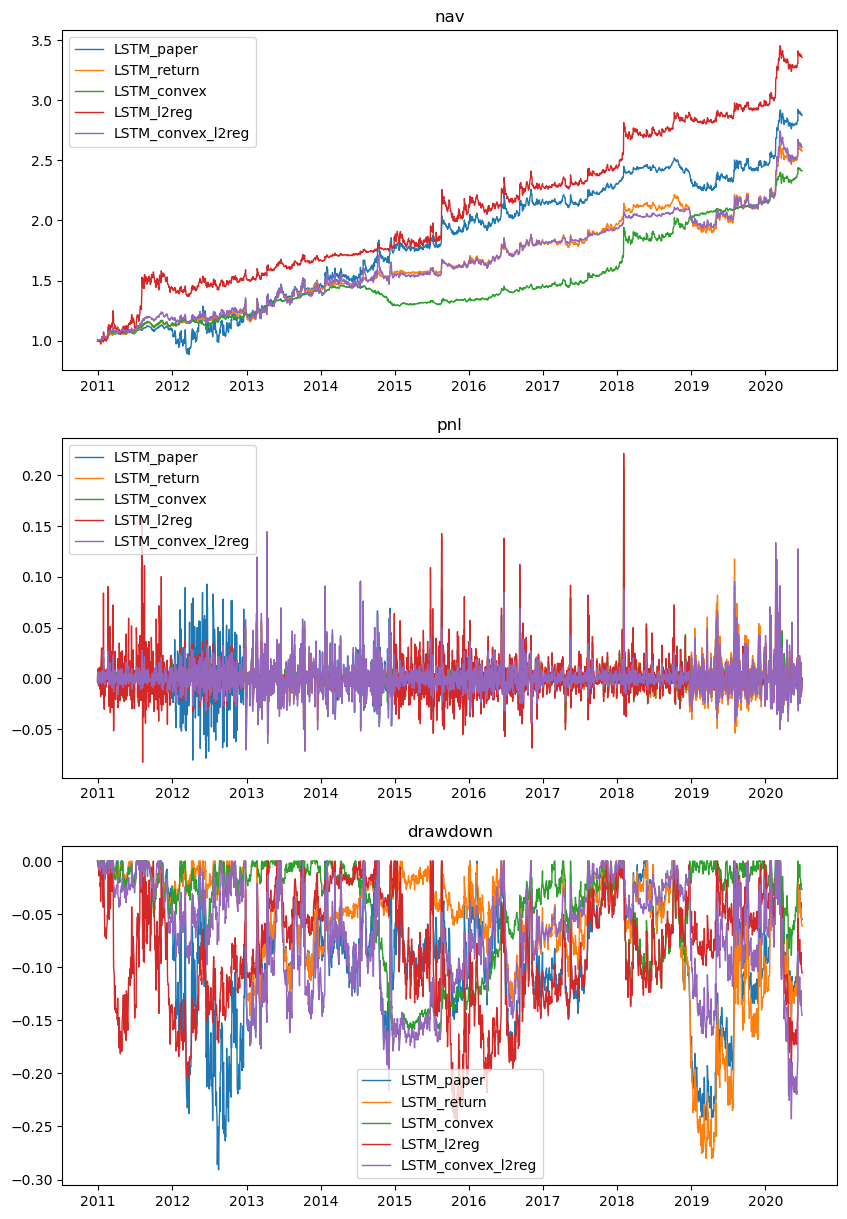

In [9]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_LSTM_return,
     weight_LSTM_convex,
     weight_LSTM_reg,
     weight_LSTM_convex_reg
    ],
    ["LSTM_paper", "LSTM_return", "LSTM_convex", "LSTM_l2reg", "LSTM_convex_l2reg"]
)

# Improvement 2: Structural Change - Autoencoder

In [10]:
%%time

tf.keras.utils.set_random_seed(110)
weight_LSTM_autoencoder = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "autoencoder")

1/1 [==============================] - 0s 275ms/step
successfully optimized portfolio weights
CPU times: user 23.4 s, sys: 527 ms, total: 23.9 s
Wall time: 22.4 s


,LSTM_paper,LSTM_autoencoder
avg annualized ret,0.196748,0.076716
avg annualized std,0.303979,0.076735
sharpe ratio,0.647243,0.999752
adjusted sharpe ratio,0.656156,0.712351
skewness,1.093406,0.169086
excess kurtosis,5.968334,7.579270
maximum drawdown,-0.290893,-0.129794
maximum drawdown length (days),369.000000,118.000000
VaR (95%),-0.025345,-0.007111
CVaR (95%),-0.039113,-0.010651


CPU times: user 2.65 s, sys: 11.4 ms, total: 2.67 s
Wall time: 2.67 s


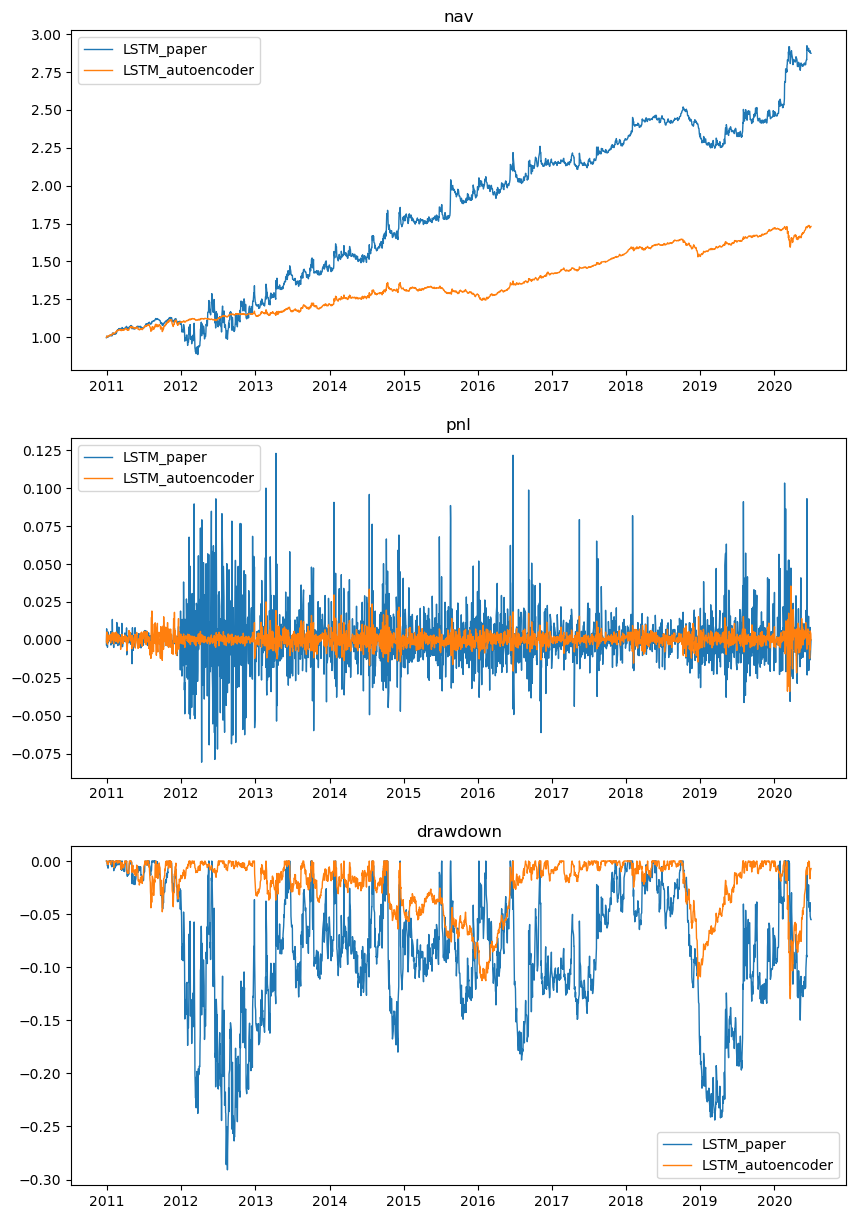

In [11]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_LSTM_autoencoder,
    ],
    ["LSTM_paper", "LSTM_autoencoder"]
)

# Improvement 3: SAE_CNN_LSTM & SAE_3CNN_LSTM

In [12]:
%%time

tf.keras.utils.set_random_seed(110)
weight_SAE_CNN_LSTM = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "SAE_CNN_LSTM")
weight_SAE_3CNN_LSTM = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "SAE_3CNN_LSTM")

1/1 [==============================] - 0s 292ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 315ms/step
successfully optimized portfolio weights
CPU times: user 50.5 s, sys: 1.01 s, total: 51.5 s
Wall time: 48.6 s


,LSTM_paper,SAE_CNN_LSTM,SAE_3CNN_LSTM
avg annualized ret,0.196748,0.076252,0.091070
avg annualized std,0.303979,0.090683,0.115571
sharpe ratio,0.647243,0.840867,0.787999
adjusted sharpe ratio,0.656156,0.709408,0.507032
skewness,1.093406,0.652635,1.495910
excess kurtosis,5.968334,8.411233,21.374716
maximum drawdown,-0.290893,-0.139872,-0.146714
maximum drawdown length (days),369.000000,106.000000,104.000000
VaR (95%),-0.025345,-0.008244,-0.009876
CVaR (95%),-0.039113,-0.012112,-0.016818


CPU times: user 3.78 s, sys: 26.7 ms, total: 3.8 s
Wall time: 3.79 s


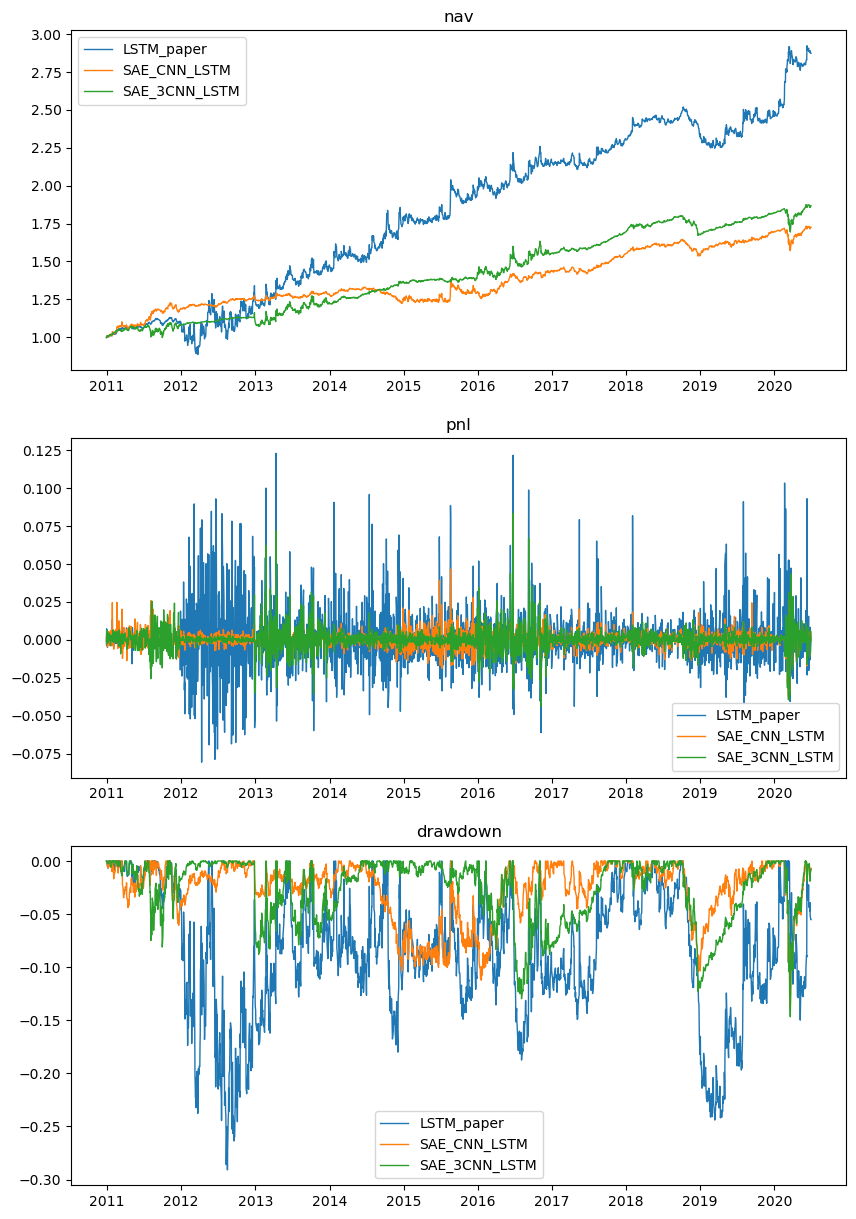

In [13]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_SAE_CNN_LSTM,
     weight_SAE_3CNN_LSTM
    ],
    ["LSTM_paper", "SAE_CNN_LSTM", "SAE_3CNN_LSTM"]
)